In [26]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
from textblob import TextBlob
import itertools
from random import choice
from matplotlib import cm

In [2]:
os.path.exists("D:\\graphs\\outputacm.txt")

False

In [5]:
lauri_path = "outputacm.txt"
test = open(lauri_path, 'r',  encoding="utf8") 
test.readlines()[0:100]

['629814\n',
 '#*Automated Deduction in Geometry: 5th International Workshop, ADG 2004, Gainesville, FL, USA, September 16-18, 2004, Revised Papers (Lecture Notes in Computer ... / Lecture Notes in Artificial Intelligence)\n',
 '#@Hoon Hong,Dongming Wang\n',
 '#t2006\n',
 '#c\n',
 '#index0\n',
 '\n',
 '#*A+ Certification Core Hardware (Text & Lab Manual)\n',
 '#@Charles J. Brooks\n',
 '#t2003\n',
 '#c\n',
 '#index1\n',
 '\n',
 '#*Performance engineering in industry: current practices and adoption challenges\n',
 '#@Ahmed E. Hassan,Parminder Flora\n',
 '#t2007\n',
 '#cProceedings of the 6th international workshop on Software and performance\n',
 '#index2\n',
 '#!This panel session discusses performance engineering practices in industry. Presentations in the session will explore the use of lightweight techniques and approaches in order to permit the cost effective and rapid adoption of performance modeling research by large industrial software systems.\n',
 '\n',
 '#*Dude, You Can Do It!

In [6]:
G = nx.DiGraph()

In [7]:
def create_graph(reference):
    G.add_node(reference['index']) # add node
    G.add_node(reference['index'], title=reference['title']) # add title attribute to node
    G.add_node(reference['index'], journal=reference['journal']) # add journal attribute to node
    if 'abstract' in reference:
        G.add_node(reference['index'], abstract=reference['abstract']) # add abstract attribute to node
    else:
        G.add_node(reference['index'], abstract="")
    for citation in reference['citations']:
        G.add_edge(reference['index'], citation) # add edge to node

In [6]:
def parse_data():
    with open(lauri_path, 'r',  encoding="utf8") as f:
        reference={}
        citations=[]
        readFile = f.readlines()
        for line in readFile:
            
            if '#*' in line: # article title
                if (bool(reference)):
                    reference['citations'] = citations
                    citations=[]
                    create_graph(reference)
                    try:
                        yield reference
                    except IndexError as e:
                        continue
                    reference={}
                reference['title'] = line[2:].rstrip()
            elif '#@' in line: # authors
                reference['author'] = line[2:].rstrip().rsplit(";")
            elif '#t' in line: # year published
                reference['year'] = line[2:].rstrip()
            elif '#c' in line: # journal
                reference['journal'] = line[2:].rstrip()
            elif '#index' in line: # index
                reference['index'] = line[6:].rstrip()
            elif '#%' in line: # id of cited paper
                citations.append(line[2:].rstrip())
            elif '#!' in line: # abstract
                reference['abstract'] = line[2:].rstrip()
                if (bool(reference)):
                    reference['citations'] = citations
                    citations=[]
                    create_graph(reference)
                    try:
                        yield reference
                    except IndexError as e:
                        continue
        create_graph(reference)
        return reference

In [9]:
data = pd.DataFrame(parse_data(), columns =('index', 'title', 'author',
                                            'year', 'journal', 'citations', 'abstract'))

In [8]:
print(G.number_of_nodes(), 'nodes')
print(G.size(), 'edges')

629814 nodes
632751 edges


In [9]:
data_top = data.head() 
data_top  

,index,title,author,year,journal,citations,abstract
0,0,Automated Deduction in Geometry: 5th Internati...,"[Hoon Hong,Dongming Wang]",2006,,[],NaN
1,1,A+ Certification Core Hardware (Text & Lab Man...,[Charles J. Brooks],2003,,[],NaN
2,2,Performance engineering in industry: current p...,"[Ahmed E. Hassan,Parminder Flora]",2007,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...
3,2,Performance engineering in industry: current p...,"[Ahmed E. Hassan,Parminder Flora]",2007,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...
4,3,"Dude, You Can Do It! How to Build a Sweeet PC","[Darrel Creacy,Carlito Vicencio]",2005,,[],Whether you're frustrated with current PC offe...


In [10]:
G.is_directed()

True

In [11]:
data.shape

(910892, 7)

In [10]:
data.dropna(subset=['index'])

,index,title,author,year,journal,citations,abstract
0,0,Automated Deduction in Geometry: 5th Internati...,"[Hoon Hong,Dongming Wang]",2006,,[],NaN
1,1,A+ Certification Core Hardware (Text & Lab Man...,[Charles J. Brooks],2003,,[],NaN
2,2,Performance engineering in industry: current p...,"[Ahmed E. Hassan,Parminder Flora]",2007,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...
3,2,Performance engineering in industry: current p...,"[Ahmed E. Hassan,Parminder Flora]",2007,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...
4,3,"Dude, You Can Do It! How to Build a Sweeet PC","[Darrel Creacy,Carlito Vicencio]",2005,,[],Whether you're frustrated with current PC offe...
...,...,...,...,...,...,...,...
910887,629810,Review article,[],2008,Communications of the ACM,[],NaN
910888,629811,Multimodal system evaluation using modality ef...,"[Manolis Perakakis,Alexandros Potamianos]",2008,Proceedings of the 10th international conferen...,[],"In this paper, we propose two new objective me..."
910889,629811,Multimodal system evaluation using modality ef...,"[Manolis Perakakis,Alexandros Potamianos]",2008,Proceedings of the 10th international conferen...,[],"In this paper, we propose two new objective me..."
910890,629812,Computer System Architecture,[V. K. Jain],2007,,[],NaN


In [13]:
data.shape

(910892, 7)

In [14]:
print(G.number_of_nodes(), 'nodes')
print(G.size(), 'edges')

629814 nodes
632751 edges


In [15]:
G.remove_nodes_from(list(nx.isolates(G)))

In [16]:
G.nodes['77108'].keys()

dict_keys(['title', 'journal', 'abstract'])

In [17]:
#TextBlob(G.nodes[G_sorted[3][0]]['abstract']).noun_phrases

lisäsin tarkistuksen ettei tapahdu jakamista nollalla, ja annoin kaikille verkon solmuille parserissa default abstraktin = "" jos abstraktia ei ole niin ei tarvitse käsitellä nulleja.

### NLP shared phrases using TextBlob

In [18]:
#wordlist is the wordlist of the central node and comparison is wordlist of one of it's neighbor
def shared_noun_phrases(wordlist, comparison):
    count=0
    for word in wordlist:
        if word in comparison:
            count+=1
    if (len(wordlist) == 0):
        return 0
    return count/len(wordlist)

Muutin find_noun_phrases:in palauttamaan 2 eri listaa, niin on helpompi käsitellä arvoja.

In [68]:
def find_noun_phrases(graph, starting_node):
    noun_phrases= TextBlob(G.nodes[starting_node]['abstract']).noun_phrases
    data_set=[]
    index=str(starting_node)
    for neighbor in graph.predecessors(index):
        if 'abstract' in G.nodes[neighbor].keys():
            data_set.append(shared_noun_phrases(noun_phrases, TextBlob(G.nodes[neighbor]['abstract']).noun_phrases))
    return noun_phrases, data_set

In [20]:
print(find_noun_phrases(G, '151297')[0])

['preface', 'front matter', 'preface', 'advances', 'computer hardware', 'direct contact', 'similar advances', 'computer software', 'smalltalk-80', 'computer software', 'interactive contact', 'personal computer systems', 'smalltalk-80', 'major parts', 'part', 'part', "system 's functionality", 'part', 'moderate-size application', 'part', 'smalltalk-80', 'virtual machine']


In [70]:
def select_n_nodes_with_highest_degrees(graph, n):
    node_list = [ seq[0] for seq in sorted(graph.degree, key=lambda x: x[1], reverse=True)[0:n] ]
    return node_list

### removing nodes without abstracts

In [23]:
def graph_only_nodes_with_abstract(graph):
    no_abstracts = graph.copy()
    for node in [x for x, y in graph.nodes(data=True) if y['abstract']=='']:
        no_abstracts.remove_node(node)
    #print(no_abstracts.number_of_nodes(), 'nodes after removing abstractless nodes')
    return no_abstracts

### selecting highest degree nodes

In [71]:
def select_n_nodes_with_average_degrees(graph, n):
    G_no_isolated = graph.copy()
    G_no_isolated.remove_nodes_from(list(nx.isolates(G_no_isolated)))
    #print(G.number_of_nodes(), 'nodes in G,', G_no_isolated.number_of_nodes(), 'nodes in G_no_isolated')
    node_list = [seq[0] for seq in sorted(G_no_isolated.degree, key=lambda x: x[1], reverse=True) ]
    halfway_point = int(len(node_list)/2)
    return node_list[halfway_point:(halfway_point+n)]

In [22]:
def select_n_nodes_with_highest_degrees(graph, n):
    node_list = [ seq[0] for seq in sorted(graph.degree, key=lambda x: x[1], reverse=True)[0:n] ]
    return node_list[0:n]

In [72]:
average_degree_nodes = select_n_nodes_with_average_degrees(G, 5)
for node in average_degree_nodes:
    print(G.degree(node))

3
3
3
3
3


In [50]:
G.degree(average_degree_nodes[3])

3

In [32]:
highest_degree_nodes = select_n_nodes_with_highest_degrees(graph_only_nodes_with_abstract(G), 5)

### abstract similarity percentage

In [34]:
def abstract_similarity_percentage(list):
    if len(list) != 0:
        return sum(list)/len(list)
    return 0

In [35]:
for node_index in highest_degree_nodes:
    #print(find_noun_phrases(G, node_index)[0])
    print("Node:", node_index, "// Similarity to neighbouring article abstracts:", abstract_similarity_percentage(find_noun_phrases(graph_only_nodes_with_abstract(G), node_index)[1]))

Node: 326368 // Similarity to neighbouring article abstracts: 0.004140127388535034
Node: 151297 // Similarity to neighbouring article abstracts: 0.012987012987012995
Node: 319217 // Similarity to neighbouring article abstracts: 0.00449438202247191
Node: 207703 // Similarity to neighbouring article abstracts: 0.010070869078701973
Node: 250081 // Similarity to neighbouring article abstracts: 0.03126897389192466


In [36]:
def make_comparison(graph, starting_node):
    noun_phrases= TextBlob(graph.nodes[starting_node]['abstract']).noun_phrases
    #data_set=[noun_phrases]
    data_set=[]
    random_node=take_random_node(graph, starting_node)
    for neighbor in graph.predecessors(random_node):
        if 'abstract' in graph.nodes[neighbor].keys():
            data_set.append(shared_noun_phrases(noun_phrases, TextBlob(graph.nodes[neighbor]['abstract']).noun_phrases))
    return random_node, noun_phrases, data_set
    

In [37]:
def take_random_node(graph, starting):
    while(True):
        random_node=choice(list(graph.nodes()))
        if random_node not in graph.neighbors(starting) and graph.in_degree[random_node]>10:
            return random_node
    return None

In [86]:
data= make_comparison(graph_only_nodes_with_abstract(G), '151297')
print(data[2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [89]:
#dataMedian=calculate_total_similarities(G, average_degree_nodes)
dataHigh=calculate_total_similarities(G, highest_degree_nodes)

dataHighRandom=calculate_total_similarities_random(G, highest_degree_nodes)
#dataMedianRandom=calculate_total_similarities_random(G, average_degree_nodes)

print(dataHigh)
print(dataHighRandom)

NetworkXError: The node 172963 is not in the digraph.

In [82]:
print(dataHigh)
print(len(dataHighRandom))
for thing in dataHighRandom:
    print(thing)

[0.004140127388535034, 0.012987012987012995, 0.00449438202247191, 0.010070869078701973, 0.03126897389192466]
0


In [43]:
def calculate_total_similarities(graph, nodes):
    data=[]
    for node in nodes:
        data.append(abstract_similarity_percentage(find_noun_phrases(graph_only_nodes_with_abstract(graph), node)[1]))
    return data

In [87]:
def calculate_total_similarities_random(graph, nodes):
    data=[]
    for node in nodes:
        data.append(abstract_similarity_percentage(make_comparison(graph_only_nodes_with_abstract(graph), node)[2]))
    return data

## Draw the networks

In [1]:
def get_subgraph(G, starting_node):
    """Graph: a bigger graph to get the subgraph of
       starting node: the central node to extract predecessors of
       returns a subgraph of the central node and its predecessors
    """
    nodes_list = [starting_node]
    for n in list(G.predecessors(starting_node)):
        nodes_list.append(n)
    subgraph = G.subgraph(nodes_list).copy()
    return subgraph

In [30]:
def draw_network(graph, data, size_of_nodes, to_file):
    """Graph: the subgraph to be plotted
       Data: a list of values between 0 and 1, denoting the percentage of shared noun phrases
       with the central node
    """
    blue_map = cm.get_cmap('twilight', len(graph))
    color_list = [blue_map(d) for d in data]
    if not to_file:
        nx.draw_spring(subgraph, node_color=color_list, node_size=size_of_nodes)
    else:
        nx.draw_spring(subgraph, node_color=color_list, node_size=size_of_nodes)
        plt.savefig("Graph.png", format="PNG")

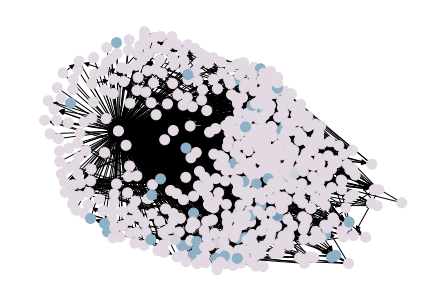

In [32]:
# give the number of a node to draw a subgraph of
node_number = '151297'
subgraph = get_subgraph(G, node_number)
_, data = find_noun_phrases(subgraph, node_number)

# add color of the 1st node (add 0 as the 1st element of the list)
data.insert(0, 1)

# size_of_nodes: change according to the size of the graph
# to_file: set to true to draw the plot to a file
size_of_nodes = 100
to_file = True
draw_network(subgraph, data, size_of_nodes, to_file)

Ongelma: värit plotataan välillä 0  ja 1, mutta kaikki arvot on joko 0 tai suhteellisen lähellä nollaa - kunnon kontrastia ei tule. Arvot pitää ehkä normalisoida jotenkin?

Erilaisia color mappeja (tässä käytetty 'twilight'): https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html